<a href="https://colab.research.google.com/github/hondaki/DN2Reflectance/blob/main/seminar_calc_reflectance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
import rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 19.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from matplotlib import pyplot

if __name__ == "__main__":

    drive = '/content/drive/MyDrive/HondaLab/Class/CU_Class_M/制御・情報セミナー/2022_B_Fall_Ebinuma_Honda/04.DN2Reflectance/Python/'

    # Landsat 7
    REFLECTANCE_MULT_BAND_3 = 1.2902E-03
    REFLECTANCE_MULT_BAND_4 = 2.8645E-03

    REFLECTANCE_ADD_BAND_3 = -0.011668
    REFLECTANCE_ADD_BAND_4 = -0.017937

    SUN_ELEVATION = 49.84309496

    #Landsat 8
    REFLECTANCE_MULT_BAND_4 = 2.0000E-05
    REFLECTANCE_MULT_BAND_5 = 2.0000E-05
    REFLECTANCE_ADD_BAND_4 = -0.100000
    REFLECTANCE_ADD_BAND_5 = -0.100000

    nodatavalue= -1.0

    l7b3_f = rasterio.open(drive+'LE07_L1TP_109036_20010922_20200917_02_T1_B3.TIF')
    l7b3 = l7b3_f.read(1)
    l7b3_ref  = np.where( l7b3 != 0, ( l7b3.astype(float) * REFLECTANCE_MULT_BAND_3 + REFLECTANCE_ADD_BAND_3) / np.sin(SUN_ELEVATION/180*3.1415) , nodatavalue )

    l7b3_ref_f = rasterio.open(drive+'LE07_L1TP_109036_20010922_20200917_02_T1_B3_REF.TIF', 'w', width = l7b3_f.width, height=l7b3_f.height, count=1, crs=l7b3_f.crs, dtype='float32', transform = l7b3_f.transform, nodata=nodatavalue)
    l7b3_ref_f.write( l7b3_ref, 1 )
    l7b3_ref_f.close()

In [ ]:
l7b3


In [ ]:
l7b3_ref_f = rasterio.open(drive+'LE07_L1TP_109036_20010922_20200917_02_T1_B3_REF.TIF')
l7b3_ref = l7b3_ref_f.read(1)

In [ ]:
l7b3_ref

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [ ]:
l7b3_ref_f.nodata

-1.0

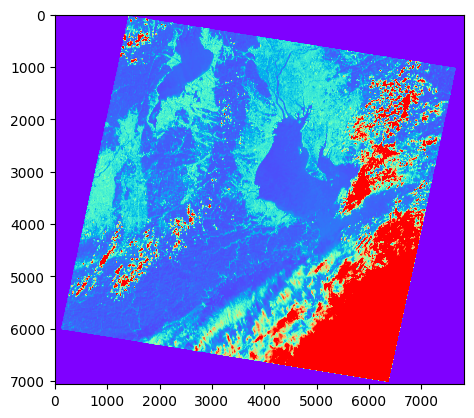

In [ ]:
pyplot.imshow(l7b3_ref, cmap='rainbow', vmin=0., vmax = 0.3)